# HW6 tc406113


I trained a RandomForest model on the phoneme dataset with an 80-20 train-test split.


It exhibited a fair bit of overfitting, on par with the behaviour on previous exercises:


| Metric            | TRAIN                | TEST                 |
|-------------------|----------------------|----------------------|
| Accuracy Score    | 0.999                 | 0.911                |
| Precision Score   | 1.000                | 0.841                |
| Recall Score      | 0.999                | 0.857                |
| F1 Score          | 0.999                | 0.849                |
| AUC-ROC Score     | 1.000                | 0.962                |


## PVI for Random Forest

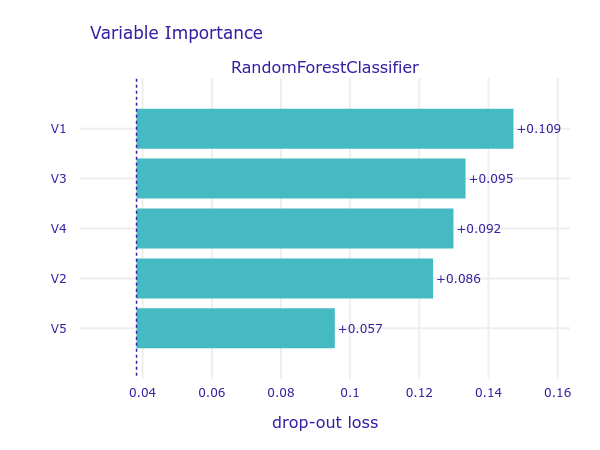

All PVI calculations are w.r.t to AUC


For RandomForest, PVI ranked features 1-3-4-2-5, with 3-4-2 somewhat close together.

## Other models

I trained three more models: XGBoost, AdaBoost and Logistic Regression. They fit the dataset a bit worse than Random Forest: XGboost almost on par, adaboost noticeably worse and Logistic Regression significantly worse. The significant drop for Logistic Regression suggests that interaction effects may be significant.

XGBoost:

| Metric            | TRAIN                | TEST                 |
|-------------------|----------------------|----------------------|
| Accuracy Score    | 0.997                | 0.902                |
| Precision Score   | 0.995                | 0.815                |
| Recall Score      | 0.993                | 0.857                |
| F1 Score          | 0.994                | 0.835                |
| AUC-ROC Score     | 0.999                | 0.958                |


AdaBoost:

| Metric            | TRAIN                | TEST                 |
|-------------------|----------------------|----------------------|
| Accuracy Score    | 0.830                | 0.807                |
| Precision Score   | 0.727                | 0.678                |
| Recall Score      | 0.673                | 0.637                |
| F1 Score          | 0.699                | 0.657                |
| AUC-ROC Score     | 0.906                | 0.890                |


Logistic Regression:

| Metric            | TRAIN                | TEST                 |
|-------------------|----------------------|----------------------|
| Accuracy Score    | 0.749                | 0.756                |
| Precision Score   | 0.593                | 0.605                |
| Recall Score      | 0.465                | 0.459                |
| F1 Score          | 0.521                | 0.522                |
| AUC-ROC Score     | 0.812                | 0.819                |


## VIP attributions of other models

### XGBoost attribution

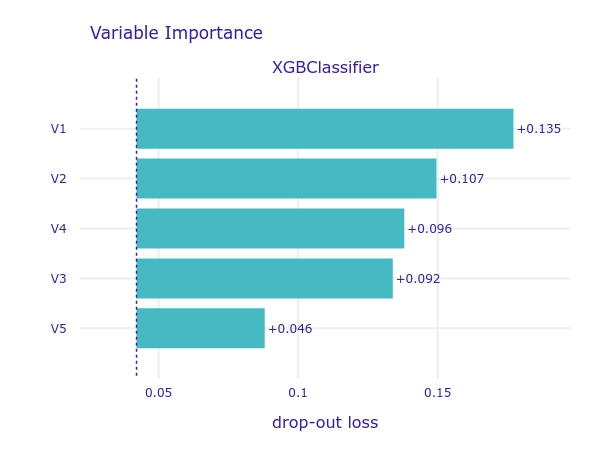

### AdaBoost attribution

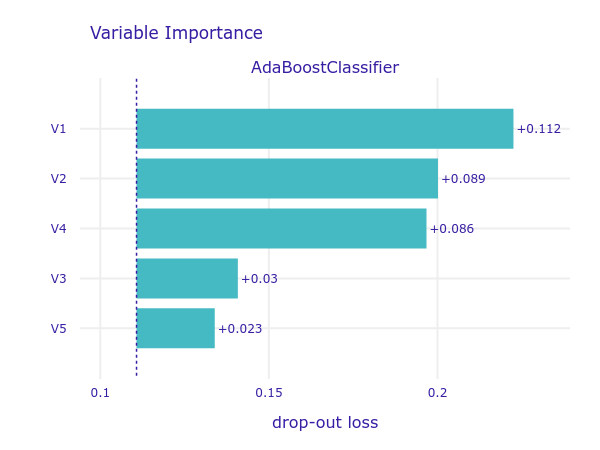

### LogisticRegression Attribution

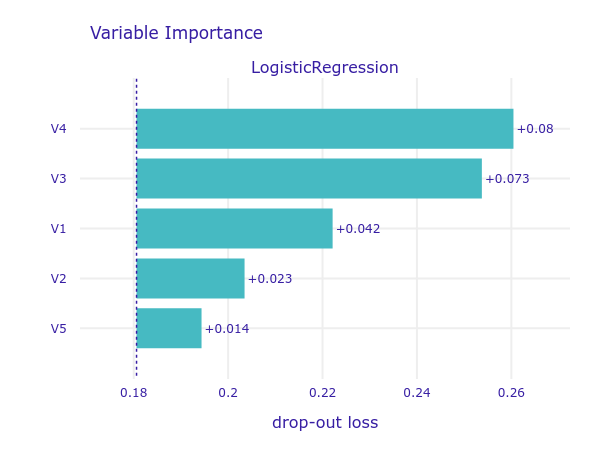

The boosting models agree with each other, while mostly matching the RF model. While the differences between RF and XGboost seem like they could be down to random chance, AdaBoost pays much less attention to feature 3.
Logistic Regression pays a lot of attention to feature 4, which wasn't as important for other models.

All models consistently classify feature 5 as the least important one. Interestingly, to recall the results of HW1, that feature is weakly correlated with others:

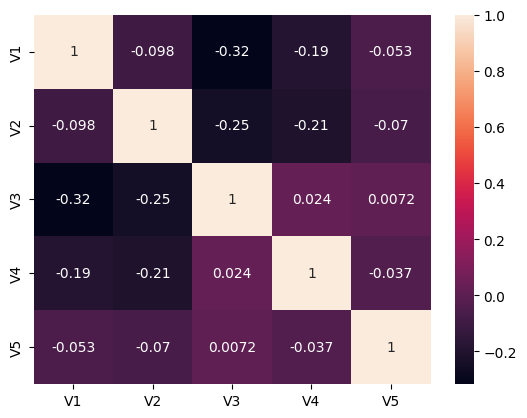


## Comparing attributions of RF model



### RF VIP (again)

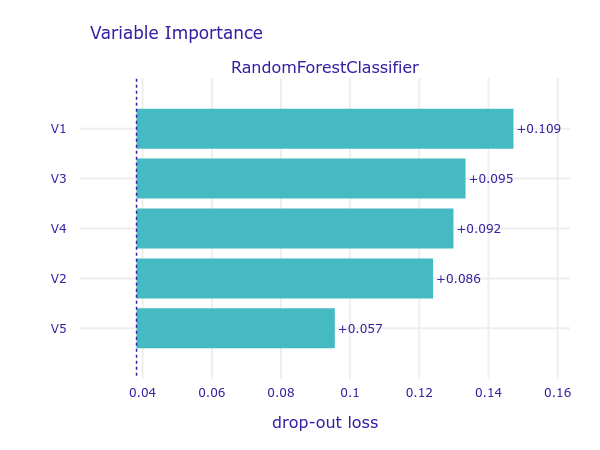

RF Gini

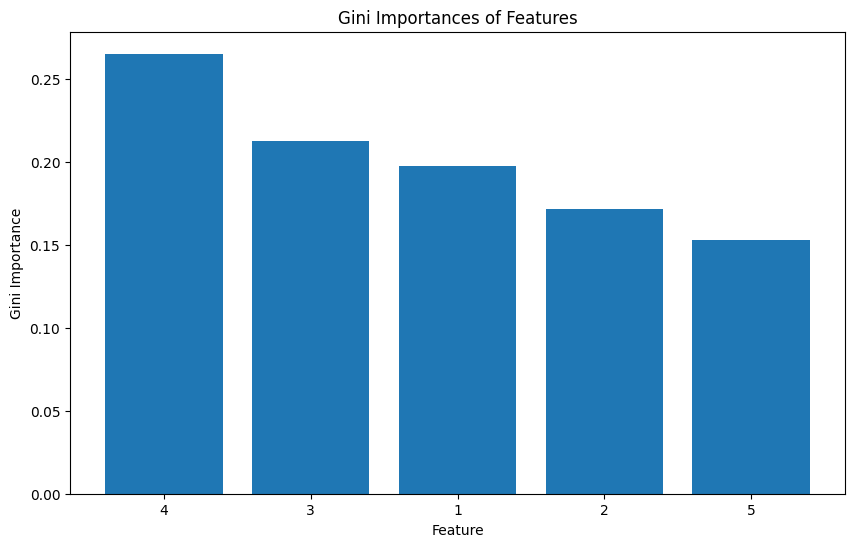

RF Shap

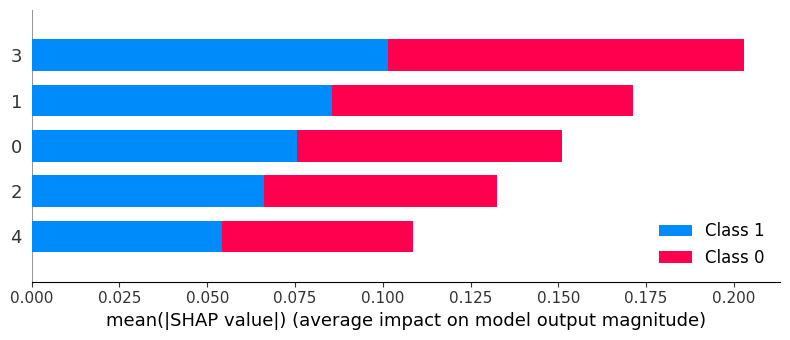

Please note the features in the Shape plot are renumbered to be zero-based. To compare with other plots, add one to each label.


Interestingly, the attributions disagree, other than paying the least attention to feature 5.

Shap and Gini pay the most attention to feature 4, agreeing with Logistic Regression.

It seems like there are two possible modes a model can fall into:

4 - (1-2-3) - 5 - exhibited by RF shap, RF gini, and LR VIP


1 - (2-3-4) - 5 - exhibited by RF VIP, AdaBoost VIP, XGBoost VIP.

As feature 1 is correlated with feature 3 and 4, this behaviour may be down to which of the correlated covariates is chose by the model / explanation.

Overall, it seems like the phoneme dataset is not the most gracious one for exploration of explanation techniques - over all experiments, all features seem to be meaningful. While beneficial from an accuracy standpoint, we don't get to experience the behaviour of XAI methods in cases where one or more features are not reliable predictors.


Unfortunately I cannot observe any noticeable differences between the methods more and less sensitive to interaction effects.

#Appendix

## Setup

In [ ]:
!pip install openml
!pip install dalex
!pip install shap

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import fetch_openml
import dalex as dx
import shap
import pandas as pd
import numpy as np
np.random.seed(42)

X, y = fetch_openml('phoneme', return_X_y=True) #Turns out there's a simpler way than the one I used in earlier labs. I checked the data seems to be the same.
#Avoid issues with categorical adnn 1/2 istead of 0/1
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Multiple active versions of the dataset matching the name phoneme exist. Versions may be fundamentally different, returning version 1.
The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.


In [ ]:
# 1. Random Forest

# 2. XGboost
# 3. AdaBoost
# 4. Logistic regression

In [ ]:
#Lifted straight from HW2
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def score_set(true, pred, prob):
  accuracy = accuracy_score(true, pred)
  precision = precision_score(true, pred)
  recall = recall_score(true, pred)
  f1 = f1_score(true, pred)
  rocauc = roc_auc_score(true, prob)

  print("Accuracy Score:", accuracy)
  print("Precision Score:", precision)
  print("Recall Score:", recall)
  print("F1 Score:", f1)
  print("AUC-ROC Score:", rocauc)


def score_single(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)

  train_pred = model.predict(xtrain)
  train_prob = model.predict_proba(xtrain)[:, 1]

  test_pred = model.predict(xtest)
  test_prob = model.predict_proba(xtest)[:, 1]

  print("TRAIN:")
  score_set(ytrain, train_pred, train_prob)

  print("TEST:")
  score_set(ytest, test_pred, test_prob)

## Training main model: RandomForest

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9111933395004626


In [ ]:
score_single(pipeline, X_train, y_train, X_test, y_test)

TRAIN:
Accuracy Score: 0.9997686791579922
Precision Score: 1.0
Recall Score: 0.9992138364779874
F1 Score: 0.9996067636649627
AUC-ROC Score: 1.0
TEST:
Accuracy Score: 0.9111933395004626
Precision Score: 0.840625
Recall Score: 0.856687898089172
F1 Score: 0.8485804416403785
AUC-ROC Score: 0.9617356895506523


In [ ]:
explainer = dx.Explainer(pipeline, X_test, y_test)

Preparation of a new explainer is initiated

  -> data              : 1081 rows 5 cols
  -> target variable   : 1081 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7ab868f9c9d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.299, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.91, mean = -0.00835, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but StandardScaler was fitted with feature names


In [ ]:
explainer.model_performance()

,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.859873,0.838509,0.849057,0.911193,0.961736


In [ ]:
pvi = explainer.model_parts(random_state=0)

In [ ]:
pvi.result

,variable,dropout_loss,label
0,_full_model_,0.038246,RandomForestClassifier
1,V5,0.095570,RandomForestClassifier
2,V2,0.123971,RandomForestClassifier
3,V4,0.129865,RandomForestClassifier
4,V3,0.133360,RandomForestClassifier
5,V1,0.147214,RandomForestClassifier
6,_baseline_,0.509820,RandomForestClassifier


In [ ]:
# pvi with auc
pvi.plot(show=False).update_layout(autosize=False, width=600, height=450)

## Training XGBoost

In [ ]:

import xgboost as xgb
pipeline = Pipeline([
    ('scaler', StandardScaler()), #in case you're wondering this properly ignores Y
    ('classifier', xgb.XGBClassifier())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9019426456984274


In [ ]:
score_single(pipeline, X_train, y_train, X_test, y_test)

TRAIN:
Accuracy Score: 0.9965301873698821
Precision Score: 0.9952718676122931
Recall Score: 0.9929245283018868
F1 Score: 0.9940968122786304
AUC-ROC Score: 0.9999044029280018
TEST:
Accuracy Score: 0.9019426456984274
Precision Score: 0.8151515151515152
Recall Score: 0.856687898089172
F1 Score: 0.8354037267080745
AUC-ROC Score: 0.9577018576802664


In [ ]:
explainer = dx.Explainer(pipeline, X_test, y_test)

Preparation of a new explainer is initiated

  -> data              : 1081 rows 5 cols
  -> target variable   : 1081 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7ab868f9c9d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.48e-05, mean = 0.301, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.994, mean = -0.0102, max = 0.998
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
explainer.model_performance()

,recall,precision,f1,accuracy,auc
XGBClassifier,0.856688,0.815152,0.835404,0.901943,0.957702


In [ ]:
pvi = explainer.model_parts(random_state=0)

In [ ]:
pvi.result

,variable,dropout_loss,label
0,_full_model_,0.042092,XGBClassifier
1,V5,0.088029,XGBClassifier
2,V3,0.133920,XGBClassifier
3,V4,0.138049,XGBClassifier
4,V2,0.149573,XGBClassifier
5,V1,0.177170,XGBClassifier
6,_baseline_,0.511769,XGBClassifier


In [ ]:
# pvi with auc
pvi.plot(show=False).update_layout(autosize=False, width=600, height=450)

## Training AdaBoost


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), #in case you're wondering this properly ignores Y
    ('classifier', AdaBoostClassifier())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8066604995374653


In [ ]:
score_single(pipeline, X_train, y_train, X_test, y_test)

TRAIN:
Accuracy Score: 0.8295165394402035
Precision Score: 0.7272727272727273
Recall Score: 0.6729559748427673
F1 Score: 0.699060841159657
AUC-ROC Score: 0.9062909057552014
TEST:
Accuracy Score: 0.8066604995374653
Precision Score: 0.6779661016949152
Recall Score: 0.6369426751592356
F1 Score: 0.6568144499178983
AUC-ROC Score: 0.8899841387156513


In [ ]:
explainer = dx.Explainer(pipeline, X_test, y_test)

Preparation of a new explainer is initiated

  -> data              : 1081 rows 5 cols
  -> target variable   : 1081 values
  -> model_class       : sklearn.ensemble._weight_boosting.AdaBoostClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7ab868f9c9d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.311, mean = 0.479, max = 0.518
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.512, mean = -0.189, max = 0.52
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
explainer.model_performance()

,recall,precision,f1,accuracy,auc
AdaBoostClassifier,0.636943,0.677966,0.656814,0.80666,0.889984


In [ ]:
pvi = explainer.model_parts(random_state=0)

In [ ]:
pvi.result

,variable,dropout_loss,label
0,_full_model_,0.110744,AdaBoostClassifier
1,V5,0.133942,AdaBoostClassifier
2,V3,0.140791,AdaBoostClassifier
3,V4,0.196748,AdaBoostClassifier
4,V2,0.200158,AdaBoostClassifier
5,V1,0.222544,AdaBoostClassifier
6,_baseline_,0.507527,AdaBoostClassifier


In [ ]:
# pvi with auc
pvi.plot(show=False).update_layout(autosize=False, width=600, height=450)

## Training Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()), #in case you're wondering this properly ignores Y
    ('classifier', LogisticRegression())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.755781683626272


In [ ]:
score_single(pipeline, X_train, y_train, X_test, y_test)

TRAIN:
Accuracy Score: 0.7487855655794587
Precision Score: 0.5933734939759037
Recall Score: 0.46462264150943394
F1 Score: 0.5211640211640213
AUC-ROC Score: 0.8118381642063949
TEST:
Accuracy Score: 0.755781683626272
Precision Score: 0.6050420168067226
Recall Score: 0.4585987261146497
F1 Score: 0.5217391304347826
AUC-ROC Score: 0.8192228801102817


In [ ]:
explainer = dx.Explainer(pipeline, X_test, y_test)

Preparation of a new explainer is initiated

  -> data              : 1081 rows 5 cols
  -> target variable   : 1081 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7ab868f9c9d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0248, mean = 0.286, max = 0.867
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.796, mean = 0.00415, max = 0.957
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
explainer.model_performance()

,recall,precision,f1,accuracy,auc
LogisticRegression,0.458599,0.605042,0.521739,0.755782,0.819223


In [ ]:
pvi = explainer.model_parts(random_state=0)

In [ ]:
pvi.result

,variable,dropout_loss,label
0,_full_model_,0.180592,LogisticRegression
1,V5,0.194364,LogisticRegression
2,V2,0.203478,LogisticRegression
3,V1,0.222134,LogisticRegression
4,V3,0.253753,LogisticRegression
5,V4,0.260449,LogisticRegression
6,_baseline_,0.505489,LogisticRegression


In [ ]:
# pvi with auc
pvi.plot(show=False).update_layout(autosize=False, width=600, height=450)

## PVI vs other metrics

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_classifier', RandomForestClassifier(n_estimators=100, random_state=42))
  ])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9111933395004626


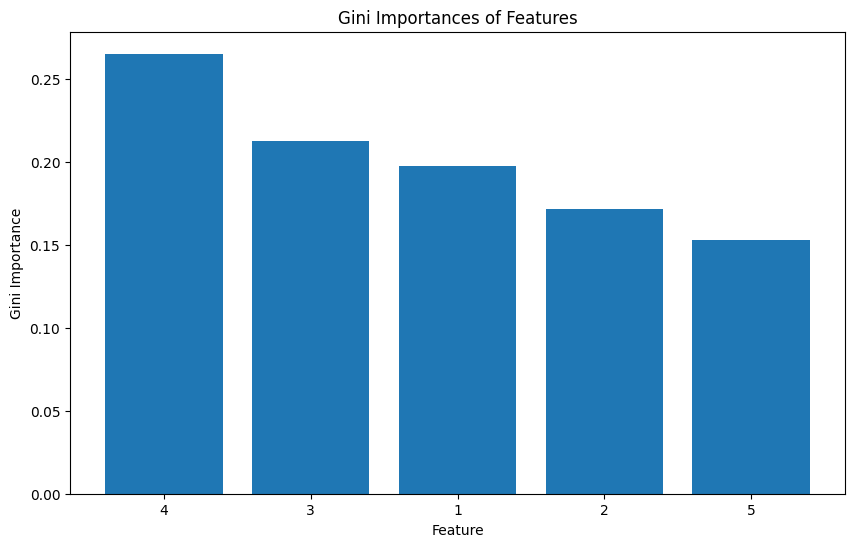

In [ ]:
import matplotlib.pyplot as plt
mod = pipeline.named_steps['rf_classifier']
importances = mod.feature_importances_
# argsort importances descending
indices = sorted(range(len(importances)), key=lambda k: importances[k], reverse=True)

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [str(i+1) for i in indices])
plt.xlabel("Feature")
plt.ylabel("Gini Importance")
plt.title("Gini Importances of Features")
plt.show()

In [ ]:
## Treeshap cant handle pipelines
# So we need to grab the model from the pipeline and feed it preprocessed data
# calculate shap on test for consistency
preproc  = pipeline.named_steps['scaler']
mod = pipeline.named_steps['rf_classifier']
transformed_test= preproc.transform(X_test)
explainer = dx.Explainer(mod, transformed_test, y_test)
parts = explainer.model_parts(type="shap_wrapper", shap_explainer_type="TreeExplainer")

Preparation of a new explainer is initiated

  -> data              : numpy.ndarray converted to pandas.DataFrame. Columns are set as string numbers.
  -> data              : 1081 rows 5 cols
  -> target variable   : 1081 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7ab868f9c9d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.299, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.91, mean = -0.00835, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

 99%|===================| 1980/2000 [01:00<00:00]       

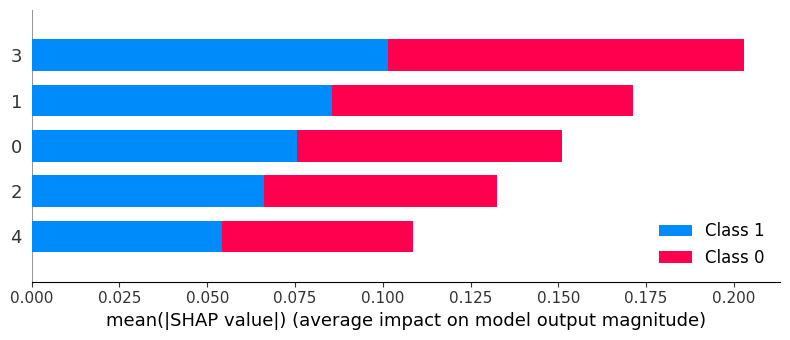

In [ ]:
parts.plot()